In [71]:
import pandas as pd
import os

from scipy import signal

import matplotlib.pyplot as plt

import numpy as np

In [72]:
from pydantic import BaseModel, Field
from typing import List
class CarpetRegion(BaseModel):
    start_hz: float = Field(..., description="Start frequency in Hz")
    end_hz: float = Field(..., description="End frequency in Hz")
class Wave(BaseModel):
    time: List[float] = Field(..., description="Time points of the wave")
    signal: List[float] = Field(..., description="Signal values")


class Model:
    def __init__(self, **params):
        # Store hyperparameters if needed
        self.params = params
    def predict(self, wave: Wave) -> List[CarpetRegion]:
        """
        Predict carpet regions from a given wave.
        This should be implemented with actual logic.
        """
        # Example placeholder
        raise NotImplementedError("Predict method not implemented.")

In [73]:
path = "./part_2/"
files = os.listdir(path)

In [74]:
files

['11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv',
 '3186c48d-fc24-5300-910a-6d0bafdd87ea.csv',
 '555cbc73-5a58-53a2-b432-c415f46e8c7c.csv',
 '6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv',
 '75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv',
 '771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv',
 '82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv',
 '9da3a9bb-65e4-5899-9280-cdd730913e87.csv',
 'ad57d6b2-f816-5bb2-b4e8-191404207168.csv',
 'b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv',
 'b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv',
 'ccd17931-56bc-5470-8a47-89356b267edd.csv',
 'ce31ebce-aa58-5112-9643-89c4559dd5ae.csv',
 'e45bb50b-c9e8-560b-bb90-1946e68be430.csv',
 'f26b0d46-fb3e-5a2f-9121-73653390cb09.csv']

<Axes: >

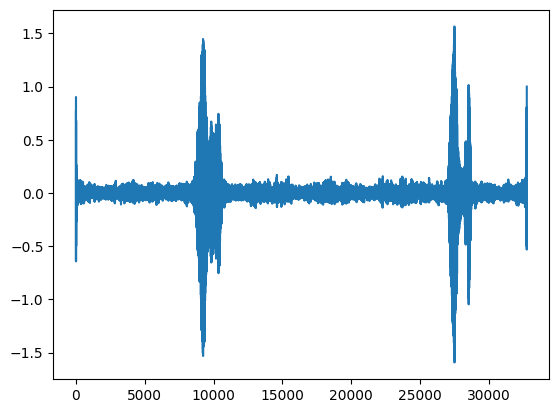

In [75]:
data = pd.read_csv(path+files[1])

data["data"].plot()



<Axes: >

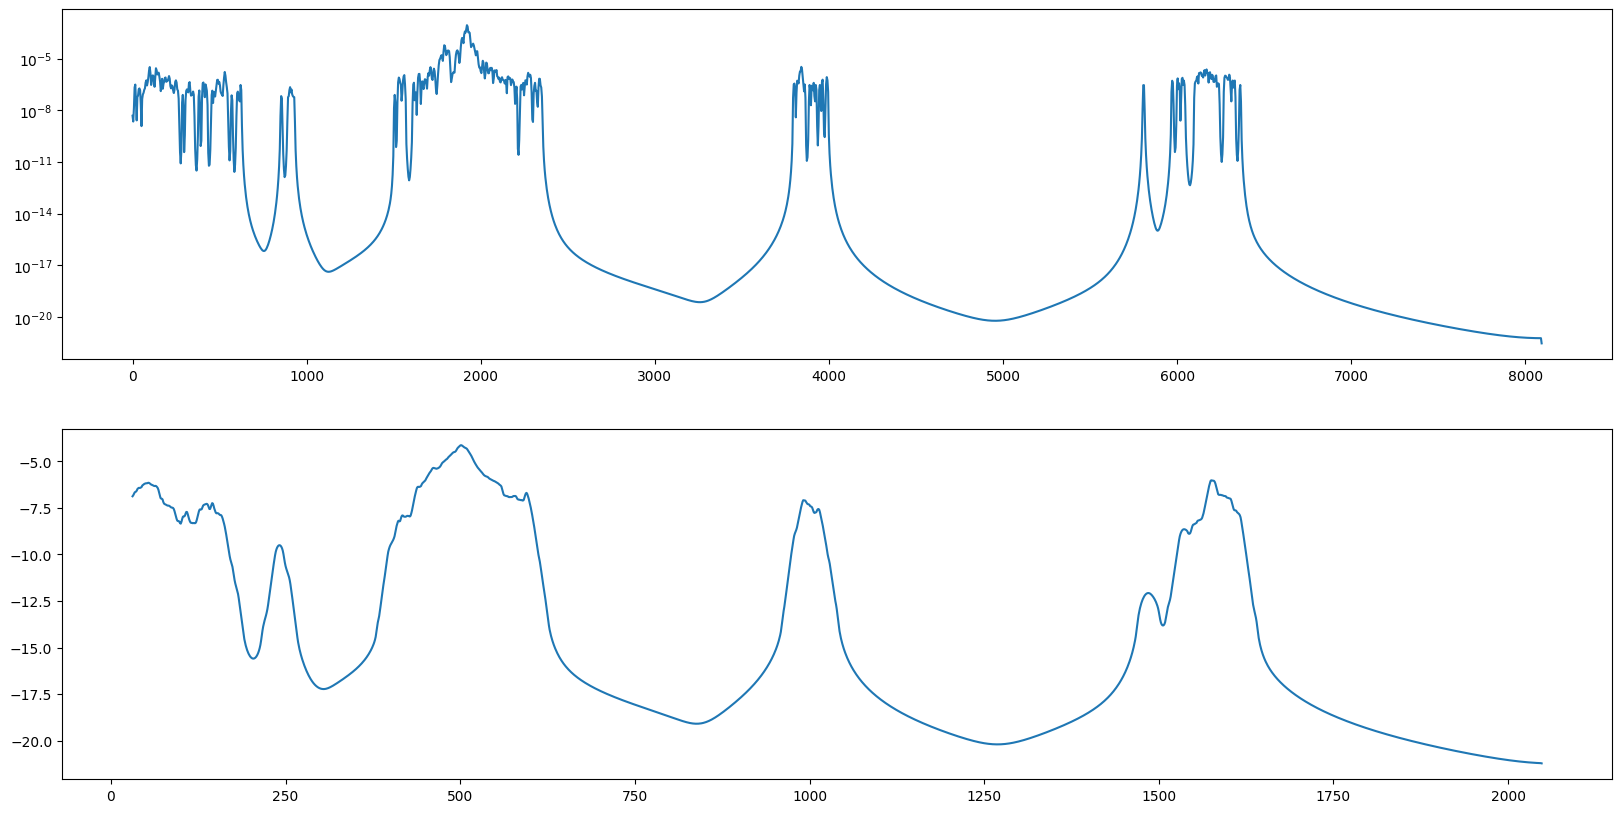

In [78]:
fs = data.shape[0] / data["t"].max()          # taxa de amostragem
f, Pxx = signal.welch(data["data"], fs=fs, window='hann', nperseg=4096, noverlap=2048, scaling='density')

fig,axs = plt.subplots(2,1,figsize=(20,10))

axs[0].semilogy(f,Pxx)
(pd.Series(np.log10(Pxx)).rolling(32).sum()/32).plot(ax=axs[1])